# Basic text processing 1

Learn to use Python to:
1. read text files
2. clean text
3. count words (frequency analysis)
4. plot keywords (visualization)


Learn at the same time about the concepts:

1. strings
2nd list
3. RegEX
4. list comprehensions
5. loops
6. dictionaries

# Read text files

We get the book Frankenstein from Project Gutenberg and use it for the rest of the workshop. We download the Plain Text UTF-8 version.

In [1]:
import urllib.request

url = 'https://gutenberg.org/cache/epub/84/pg84.txt'
raw_text = urllib.request.urlopen(url).read().decode()
# save for later
with open('Frankenstein.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)

## Strings
The variable raw_text is a [string](https://www.w3schools.com/python/python_strings.asp).

By calling the method find('fictitious text string') we can get an index number equal to the index number where 'fictitious text string' begins.

Below we use Python's string method [find()](https://www.w3schools.com/python/ref_string_find.asp) to find the index numbers where the text starts and ends, and we use ["slicing strings"] (https://www.w3schools.com/python/python_strings_slicing.asp) to slice the text.

In [2]:
text_start = raw_text.find('*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text_start = text_start + len('*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text = raw_text[text_start:text_end].strip() # Slice

# Clean text for grammatical characters

Cleaning the text will often be a fundamental necessity before working on using different methods to analyze the text. Cleaning often consists of removing grammatical characters, ensuring that all uppercase letters are changed to lowercase, and that [stop words](https://en.wikipedia.org/wiki/Stop_word) have been filtered out.

When we need to clean our text of grammatical characters, we use RegEX patterns and Python string methods. Below we test two different RegEX patterns.

When we work with RegEx, the website [regex101.com](https://regex101.com/) is a brilliant tool, because we can get help partly to understand Regex, partly to write a Regex pattern.

Try to open the page and insert this text string: _Chapter 1 I am by birth a Genevese, and my family is one of the most distinguished of that republic._ in the field 'TEXT STRING'.

**First RegEX pattern '\b\S+\b'**.

In the 'REGULAR EXPRESSION' field you can write this pattern _'\b\S+\b'_.

\b : \b finds the position at the boundary of a word (word boundary). \S: \S matches any non-space +: + matches the previous character between one and an unlimited number of times, as many times as possible until the next character. They say the plus is greedy. \b : \b finds the position at the boundary of a word (word boundary).

When you set \b\S+\b, you match from, you match all "non-space characters" as well as underscores, but not symbols such as periods, commas, question marks.

**Other RegEX pattern '\w+'**.
Another Regex pattern that is also used for cleaning is '\w+'.
\w: \w matches any alphabetic letter (uppercase and lowercase), any number, or an underscore (_). +: + matches the preceding character one or more times.

When you put \w+ together, you match whole words composed of letters, digits and underscores.

**Comparison of the two RegEX patterns**

In the first method, _There-for_ remains in a word

In the second method it becomes two words, _There for_.

Search e.g. after _About two o'clock_.

In the first method, _o'clock_ remains a word.

In the second method it becomes two words, _o clock_.

Both methods leave us with underscores (_), so to get rid of underscores we use stitch's .replace() method.

Try both methods below and inspect the result.

The code makes use of the python string methods [.lower()](https://www.w3schools.com/python/ref_string_lower.asp), [.replace()](https://www.w3schools.com/python/ ref_string_replace.asp) and [.join()](https://www.w3schools.com/python/ref_string_join.asp), as well as the 're' library, Python [RegEx](https://www.w3schools.com/ python/python_regex.asp).

In [3]:
import re
text_string = text
lower_text_string = text_string.lower()
text_wo_underscores = lower_text_string.replace('_','') # return string

#list_w_clean_text = re.findall(r'\b(\S+)\b', text_wo_underscores) # return list
list_w_clean_text = re.findall(r'\w+', text_wo_underscores) # return list

clean_text_string = ' '.join(list_w_clean_text) # join list items around whitespace and return a string
clean_text_string[0:100]

'frankenstein or the modern prometheus by mary wollstonecraft godwin shelley contents letter 1 letter'

## Split text into word lists

### Lists

We use the python stitch method [.split()](https://www.w3schools.com/python/ref_string_split.asp) to split a string into a list.

Below I use .split() to split my text string on all spaces. I save the result in the word_list variable.

Word_list will consist of all the words in the text. Each word is a string of text.

You can access the elements in the list by referring to the index number. Again, we can use both positive and negative numbers. Remember that in python the first index number is 0 and not 1.

**Lists are used to store multiple values ​​in a variable.**

Lists are distinguished by the square brackets ( [ ] ).

In [4]:
word_list = clean_text_string.split() # return list
word_list[0:10]

['frankenstein',
 'or',
 'the',
 'modern',
 'prometheus',
 'by',
 'mary',
 'wollstonecraft',
 'godwin',
 'shelley']

## Filter word lists for stop words

In [5]:
# read stop words
with open('en.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read() # return string
print (f'stop_words:\n{stopwords[:50]}\n')

stopword_list = stopwords.split('\n') # return list
print (f'stop word list: {stopword_list[0:10]}\n')

word_list_wo_stopwords = [i for i in word_list if i not in stopword_list] # List comprehension that returns list

print (f'word list with out stopwords: {word_list_wo_stopwords[0:100]}\n')

print (f'word list with stopwords: {word_list[0:100]}')

stop_words:
a
able
about
above
abst
accordance
according
accor

stop word list: ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act']

word list with out stopwords: ['frankenstein', 'modern', 'prometheus', 'mary', 'wollstonecraft', 'godwin', 'shelley', 'contents', 'letter', '1', 'letter', '2', 'letter', '3', 'letter', '4', 'chapter', '1', 'chapter', '2', 'chapter', '3', 'chapter', '4', 'chapter', '5', 'chapter', '6', 'chapter', '7', 'chapter', '8', 'chapter', '9', 'chapter', '10', 'chapter', '11', 'chapter', '12', 'chapter', '13', 'chapter', '14', 'chapter', '15', 'chapter', '16', 'chapter', '17', 'chapter', '18', 'chapter', '19', 'chapter', '20', 'chapter', '21', 'chapter', '22', 'chapter', '23', 'chapter', '24', 'letter', '1', 'saville', 'england', 'st', 'petersburgh', 'dec', '11th', '17', 'will', 'rejoice', 'hear', 'disaster', 'accompanied', 'commencement', 'enterprise', 'regarded', 'evil', 'forebodings', 'arrived', 'yesterday', 'task', '

# Word frequency analysis

## Dictionaries

Python [dictionaries](https://www.w3schools.com/python/python_dictionaries.asp) are distinguished by curly brackets; { }.

They consist of keys and values, and they have a variety of associated [methods](https://www.w3schools.com/python/python_dictionaries_methods.asp).


The code below uses [Adding Items](https://www.w3schools.com/python/python_dictionaries_add.asp) and the dictionary method [.get()](https://www.w3schools.com/python/ref_dictionary_get.asp ).

We use the code to count words and store the result in a dictionary. It consists of words as keys and the words' relative frequency as values.

We obtain the relative frequency by dividing the sum of the number of times a word appears by the total number of words.

In [8]:
tf_dict = {}
total_words = len(word_list)
for word in word_list_wo_stopwords:
    tf_dict[word] = tf_dict.get(word, 0) + 1 # adding item og .get method

for word in tf_dict:
    tf_dict[word] = tf_dict[word] / total_words # return relative frequence of raw frequence 

We now have a dictionary with words as keys and the relative frequency of the words as values.

We would like to have it sorted so that the words with the highest value are shown first.

For that we use Python's built-in function called [sorted](https://www.w3schools.com/python/ref_func_sorted.asp).

In [9]:
# Sort dictionary

tf_dict_sorted = dict(sorted(tf_dict.items(), key=lambda item: item[1], reverse=True))

# inspicer dict
# tf_dict_sorted

Later we would like to make a graph with some of the most important keywords. Therefore, we choose to take our dictionary, turn it into a list that we can slice with the index , 0 - 25; and and changes that list back to a dictionary.

In [50]:
# choose the higest values
most_common = 25
most_common_keywords = dict(list(tf_dict_sorted.items())[:most_common])
print (most_common_keywords)

{'will': 0.002574207502355267, 'man': 0.0018178681846529464, 'father': 0.0017780608521422978, 'life': 0.0015259477462415245, 'eyes': 0.0013799875270358133, 'time': 0.0013003728620145164, 'night': 0.0012340273078301023, 'elizabeth': 0.0012207581969932194, 'mind': 0.0011278744211350397, 'day': 0.0010880670886243913, 'heart': 0.0010747979777875085, 'felt': 0.0010615288669506256, 'death': 0.0010482597561137428, 'feelings': 0.0010084524236030944, 'thought': 0.0009819142019293287, 'dear': 0.0009553759802555631, 'friend': 0.0009421068694186802, 'passed': 0.0008890304260711489, 'miserable': 0.0008624922043973833, 'place': 0.0008492230935605005, 'heard': 0.0008226848718867349, 'love': 0.0007828775393760864, 'clerval': 0.0007828775393760864, 'human': 0.0007696084285392035, 'appeared': 0.0007563393177023208}


# Visualize the result
The result of a word frequency analysis is often visualized in a bar chart, because the chart is easier to understand than a table of numbers.

Below we import the visualization library Matplotlib, _import matplotlib.pyplot as plt_.
We store our data (our dictionary) in the variable _data_. The keys and values ​​are extracted into two different lists, keys (words) and values ​​(frequencies).

The bar plot (bar plot in English) is made with _plt.bar(words, frequencies, color='skyblue')_. The words appear on the x-axis and the associated words appear on the y-axis.

We customize the chart by adding relevant markets on the x- and y-axis respectively, as well as title, that way it is easier to read the chart.

Display of the diagram: _plt.tight_layout()_ adjusts the layout so that there is room to rotate the orders on the x-axis and _plt.show()_ displays the diagram.

In [12]:
import matplotlib.pyplot as plt

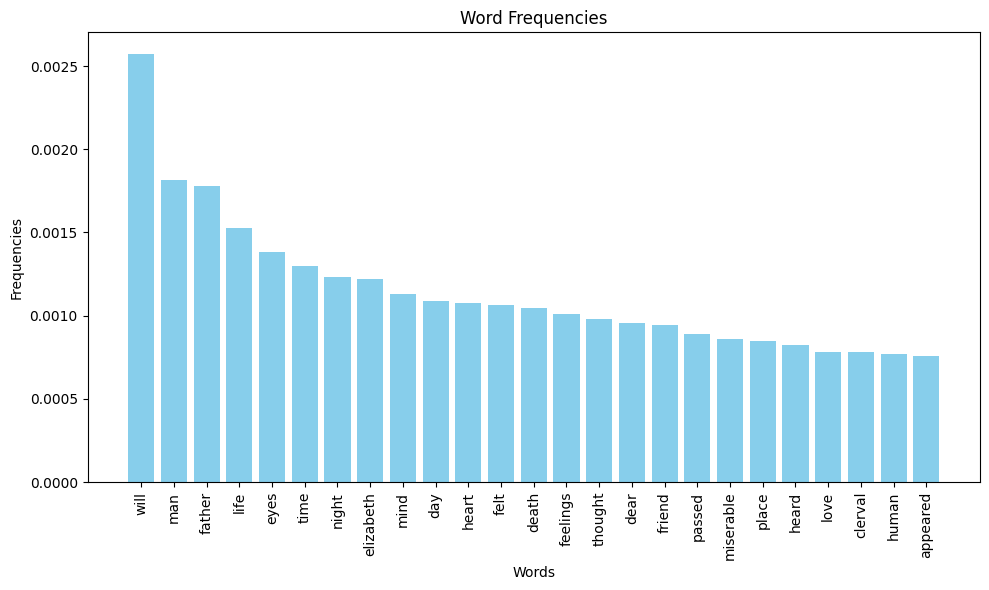

In [13]:
data = most_common_keywords

# Extract keys and values
words = list(data.keys())
frequencies = list(data.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')

# Customize the plot
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

# Basic text processing 2

Learn to use Python to:
1. read text files
2. write a function that cleans text of grammatical characters
3. split text into word lists
3. filter word lists for stop words

Learn at the same time about the concepts:

1. functions
2. pandas
3. type token ratio (TTR)

# Read text files

We get the book Frankenstein from Project Gutenberg and use it for the rest of the workshop. We download the Plain Text UTF-8 version.

In [21]:
'''url = 'https://gutenberg.org/cache/epub/84/pg84.txt'
raw_text = urllib.request.urlopen(url).read().decode()
# save for later
with open('Frankenstein.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)
'''
with open('Frankenstein.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

The variable raw_text is a [string](https://www.w3schools.com/python/python_strings.asp).

By calling the method find('fictitious text string') we can get an index number equal to the index number where 'fictitious text string' begins.

Below we use Python's string method [find()](https://www.w3schools.com/python/ref_string_find.asp) to find the index numbers where the text starts and ends, and we use ["slicing strings"] (https://www.w3schools.com/python/python_strings_slicing.asp) to slice the text.

In [22]:
text_start = raw_text.find('*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text_start = text_start + len('*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS ***')
text = raw_text[text_start:text_end].strip() # Slice

Look carefully at the text and notice the many \r and \n. It is "[Escape characters](https://www.w3schools.com/python/python_strings_escape.asp)".

We can use them to split the text into paragraphs. Try to look at the text and find out which sequence of escape characters. which we can use to divide the text into chapters. Maybe you can use find() and "slicing strings".

Once we have found which sequence of escape characters we can use to split the text, we must use the python stitch method [.split()](https://www.w3schools.com/python/ref_string_split .asp).

Click on the link above. On the page you write 'The split() method splits a string into a **list**.'

What does this mean and how does it change our text string when it is split into a list?

Below I split the text and save the result in the variable sections.

In [23]:
#sections = text.split('\r\n\r\n\r\n\r\n\r\n')
sections = text.split('\n\n\n\n\n\n\n\n\n\n')
sections[0][0:10000]

'Frankenstein;\n\n\n\nor, the Modern Prometheus\n\n\n\nby Mary Wollstonecraft (Godwin) Shelley\n\n\n\n\n\n CONTENTS\n\n\n\n Letter 1\n\n Letter 2\n\n Letter 3\n\n Letter 4\n\n Chapter 1\n\n Chapter 2\n\n Chapter 3\n\n Chapter 4\n\n Chapter 5\n\n Chapter 6\n\n Chapter 7\n\n Chapter 8\n\n Chapter 9\n\n Chapter 10\n\n Chapter 11\n\n Chapter 12\n\n Chapter 13\n\n Chapter 14\n\n Chapter 15\n\n Chapter 16\n\n Chapter 17\n\n Chapter 18\n\n Chapter 19\n\n Chapter 20\n\n Chapter 21\n\n Chapter 22\n\n Chapter 23\n\n Chapter 24'

# Functions

Python has various [built-in functions](https://www.w3schools.com/python/python_ref_functions.asp). But we can also write the [functions](https://www.w3schools.com/python/python_functions.asp) ourselves. They consist of code that processes data and returns a result. The code only runs when we call the function.

## Clean functions
We are making a function that can clean text using different regex patterns.

We reuse the code that we have written before.

In [24]:
# Cleaning function

def text_scrubber(text, regex_str):
    import re
    text_string = text
    lower_text_string = text_string.lower()
    text_wo_underscores = lower_text_string.replace('_','') # return string
    
    list_w_clean_text = re.findall(regex_str, text_wo_underscores) # return list
    
    clean_text_string = ' '.join(list_w_clean_text) # join list items around whitespace and return a string

    return clean_text_string # output text string 
    

When we need to perform the cleaning of the text with one of our functions, we need to use either a Python [loop](https://www.w3schools.com/python/python_lists_loop.asp) or [list comprehension](https://www .w3schools.com/python/python_lists_comprehension.asp) because the cleanup function must be applied to each of the text's sections stored in the list stored in the sections variable. I use a list comprehension below and then inspect the contents of the list's first element.

In [25]:
regex_str = r'\w+' 
#regex_str = r'\b(\S+)\b'
text_scrubber(text, regex_str)
sections_clean_text = [text_scrubber(i, regex_str) for i in sections]
sections_clean_text[0]

'frankenstein or the modern prometheus by mary wollstonecraft godwin shelley contents letter 1 letter 2 letter 3 letter 4 chapter 1 chapter 2 chapter 3 chapter 4 chapter 5 chapter 6 chapter 7 chapter 8 chapter 9 chapter 10 chapter 11 chapter 12 chapter 13 chapter 14 chapter 15 chapter 16 chapter 17 chapter 18 chapter 19 chapter 20 chapter 21 chapter 22 chapter 23 chapter 24'

# Pandas

Pandas is a library in Python that is used to work with data that is structured in rows and columns. You will often choose to structure your data in rows and columns if you have collected a lot of data, and there are also many data sets that are already structured this way. With a little knowledge of Pandas, you are well helped on your way to being able to get started with data analysis of larger data sets.

When you have to work with Pandas, this cheatsheet will be your friend: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Open the page and move the mouse over the page. You will find that behind the words there are links to the Pandas documentation.

Look on the first page, left column. There you see three examples of how you can create a data frame. The first two are fairly accessible, while the third is quite advanced and not widely used.

Below I have written the three different ways and I have added a fourth way which is the way that I often use. It's very similar to the first way, because I use lists, but I don't add an index, because pandas automatically adds a consecutive index.

I start building my dataframe out of the different versions of the text that we have produced above.

In [26]:
import pandas as pd

df = pd.DataFrame({'Section': sections, 'Clean_text': sections_clean_text})

df

,Section,Clean_text
0,"Frankenstein;\n\n\n\nor, the Modern Prometheus...",frankenstein or the modern prometheus by mary ...
1,"Letter 1\n\n\n\n_To Mrs. Saville, England._\n\...",letter 1 to mrs saville england st petersburgh...
2,"Letter 2\n\n\n\n_To Mrs. Saville, England._\n\...",letter 2 to mrs saville england archangel 28th...
3,"Letter 3\n\n\n\n_To Mrs. Saville, England._\n\...",letter 3 to mrs saville england july 7th 17 my...
4,"Letter 4\n\n\n\n\n\n_To Mrs. Saville, England....",letter 4 to mrs saville england august 5th 17 ...
5,"August 13th, 17—.\n\n\n\n\n\nMy affection for ...",august 13th 17 my affection for my guest incre...
6,"August 19th, 17—.\n\n\n\n\n\nYesterday the str...",august 19th 17 yesterday the stranger said to ...
7,"Chapter 1\n\n\n\n\n\nI am by birth a Genevese,...",chapter 1 i am by birth a genevese and my fami...
8,Chapter 2\n\n\n\n\n\nWe were brought up togeth...,chapter 2 we were brought up together there wa...
9,Chapter 3\n\n\n\n\n\nWhen I had attained the a...,chapter 3 when i had attained the age of seven...


# Use own functions in Pandas
When you need to apply a function to each value (row) in a column, you can use the following method, where you write your function, which you then apply to your data frame using the .apply() function. The output is saved in a new column in the same way as when you normally want to save in a variable.

In [27]:
## Function to remove stop word

# read stopwords
def filter_stopwords(clean_text):
    word_list = clean_text.split()
    with open('en.txt', 'r', encoding='utf-8') as f:
        stopwords = f.read() # return string
    stopword_list = stopwords.split('\n') # return list
    word_list_wo_stopwords = [i for i in word_list if i not in stopword_list] # List comprehension that returns list
    clean_text_wo_stopwords = ' '.join(word_list_wo_stopwords) # join list
    return clean_text_wo_stopwords

# apply function to pandas syntax 
df['Clean_text_wo_stopwords'] = df['Clean_text'].apply(lambda x: filter_stopwords(x))

In [28]:
df

,Section,Clean_text,Clean_text_wo_stopwords
0,"Frankenstein;\n\n\n\nor, the Modern Prometheus...",frankenstein or the modern prometheus by mary ...,frankenstein modern prometheus mary wollstonec...
1,"Letter 1\n\n\n\n_To Mrs. Saville, England._\n\...",letter 1 to mrs saville england st petersburgh...,letter 1 saville england st petersburgh dec 11...
2,"Letter 2\n\n\n\n_To Mrs. Saville, England._\n\...",letter 2 to mrs saville england archangel 28th...,letter 2 saville england archangel 28th march ...
3,"Letter 3\n\n\n\n_To Mrs. Saville, England._\n\...",letter 3 to mrs saville england july 7th 17 my...,letter 3 saville england july 7th 17 dear sist...
4,"Letter 4\n\n\n\n\n\n_To Mrs. Saville, England....",letter 4 to mrs saville england august 5th 17 ...,letter 4 saville england august 5th 17 strange...
5,"August 13th, 17—.\n\n\n\n\n\nMy affection for ...",august 13th 17 my affection for my guest incre...,august 13th 17 affection guest increases day e...
6,"August 19th, 17—.\n\n\n\n\n\nYesterday the str...",august 19th 17 yesterday the stranger said to ...,august 19th 17 yesterday stranger easily perce...
7,"Chapter 1\n\n\n\n\n\nI am by birth a Genevese,...",chapter 1 i am by birth a genevese and my fami...,chapter 1 birth genevese family distinguished ...
8,Chapter 2\n\n\n\n\n\nWe were brought up togeth...,chapter 2 we were brought up together there wa...,chapter 2 brought year difference ages strange...
9,Chapter 3\n\n\n\n\n\nWhen I had attained the a...,chapter 3 when i had attained the age of seven...,chapter 3 attained age seventeen parents resol...


# New systematics

## add new column
We can enrich our data set with a new column using information that we can extract from text strings.

Below we use the pandas methods .str and .extract together with a RegEX pattern to extract information about the chapters.

In [29]:
df['Chapter'] = df['Section'].str.extract('(^Chapter\s\d{1,2})')
df

,Section,Clean_text,Clean_text_wo_stopwords,Chapter
0,"Frankenstein;\n\n\n\nor, the Modern Prometheus...",frankenstein or the modern prometheus by mary ...,frankenstein modern prometheus mary wollstonec...,NaN
1,"Letter 1\n\n\n\n_To Mrs. Saville, England._\n\...",letter 1 to mrs saville england st petersburgh...,letter 1 saville england st petersburgh dec 11...,NaN
2,"Letter 2\n\n\n\n_To Mrs. Saville, England._\n\...",letter 2 to mrs saville england archangel 28th...,letter 2 saville england archangel 28th march ...,NaN
3,"Letter 3\n\n\n\n_To Mrs. Saville, England._\n\...",letter 3 to mrs saville england july 7th 17 my...,letter 3 saville england july 7th 17 dear sist...,NaN
4,"Letter 4\n\n\n\n\n\n_To Mrs. Saville, England....",letter 4 to mrs saville england august 5th 17 ...,letter 4 saville england august 5th 17 strange...,NaN
5,"August 13th, 17—.\n\n\n\n\n\nMy affection for ...",august 13th 17 my affection for my guest incre...,august 13th 17 affection guest increases day e...,NaN
6,"August 19th, 17—.\n\n\n\n\n\nYesterday the str...",august 19th 17 yesterday the stranger said to ...,august 19th 17 yesterday stranger easily perce...,NaN
7,"Chapter 1\n\n\n\n\n\nI am by birth a Genevese,...",chapter 1 i am by birth a genevese and my fami...,chapter 1 birth genevese family distinguished ...,Chapter 1
8,Chapter 2\n\n\n\n\n\nWe were brought up togeth...,chapter 2 we were brought up together there wa...,chapter 2 brought year difference ages strange...,Chapter 2
9,Chapter 3\n\n\n\n\n\nWhen I had attained the a...,chapter 3 when i had attained the age of seven...,chapter 3 attained age seventeen parents resol...,Chapter 3


## Subsets - rows and columns

In the [cheatsheets](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) section "Subsets - rows and columns" there are various examples of how you can select a subset. That is, how you can select a smaller part of your data set.

- df.iloc[10:20] # Select rows 10-20.
- df.iloc[:, [1, 2, 5]] # Select columns in positions 1, 2 and 5 (first column is 0).
- df.loc[:, 'x2':'x4'] # Select all columns between x2 and x4 (inclusive).
- df.loc[df['a'] > 10, ['a', 'c']] # Select rows meeting logical condition, and only the specific columns.
- df.iat[1, 2] # Access single value by index
- df.at[4, 'A'] # Access single value by label

Let's try some concrete examples with [.iloc[ ]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) and [.at[ ]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at).

In [30]:
df.iloc[7:10, :] # From row eight to ten inclusive, as well as all columns

,Section,Clean_text,Clean_text_wo_stopwords,Chapter
7,"Chapter 1\n\n\n\n\n\nI am by birth a Genevese,...",chapter 1 i am by birth a genevese and my fami...,chapter 1 birth genevese family distinguished ...,Chapter 1
8,Chapter 2\n\n\n\n\n\nWe were brought up togeth...,chapter 2 we were brought up together there wa...,chapter 2 brought year difference ages strange...,Chapter 2
9,Chapter 3\n\n\n\n\n\nWhen I had attained the a...,chapter 3 when i had attained the age of seven...,chapter 3 attained age seventeen parents resol...,Chapter 3


In [31]:
df.iloc[7:10, -2:] # From row eight onwards with ten, as well as the two outermost columns on the right

,Clean_text_wo_stopwords,Chapter
7,chapter 1 birth genevese family distinguished ...,Chapter 1
8,chapter 2 brought year difference ages strange...,Chapter 2
9,chapter 3 attained age seventeen parents resol...,Chapter 3


In [33]:
df.at[0, 'Clean_text'] # First row second column

'frankenstein or the modern prometheus by mary wollstonecraft godwin shelley contents letter 1 letter 2 letter 3 letter 4 chapter 1 chapter 2 chapter 3 chapter 4 chapter 5 chapter 6 chapter 7 chapter 8 chapter 9 chapter 10 chapter 11 chapter 12 chapter 13 chapter 14 chapter 15 chapter 16 chapter 17 chapter 18 chapter 19 chapter 20 chapter 21 chapter 22 chapter 23 chapter 24'

It is also possible to search for text and return the rows that contain the text. For that you use .str.contains. When I select all rows where the 'Chapter column contains the text 'Chapter', I get a subset consisting only of the chapters.

In [37]:
subset = df[df['Chapter'].str.contains('Chapter', na=False)].reset_index(drop=True)

## Add more columns and calculate type / token ratio (TTR)

A high TTR shows that the text uses a number of different words, which indicates more complex or diverse content. A low TTR shows that the text uses a limited set of words, which indicates a more efficient and repetitive use of words.
The formula is:


$$
TTR = \frac{\text{Number of Unique Words (Types)}}{\text{Total Number of Words (Tokens)}}
$$

In [38]:
# Total amount of words
subset['Word_count'] = subset['Clean_text'].apply(lambda x : len(x.split()))

# Sum of unique words (Types)
subset['Tokens_count'] = subset['Clean_text'].apply(lambda x : len(set(x.split())))

# Calculate ttr
subset['TTR'] = subset['Tokens_count'] / subset['Word_count']

# Calculate mean ttr
average = subset['TTR'].mean()

# Calculate difference from mean
subset['TTR_differences'] = subset['TTR'] - average

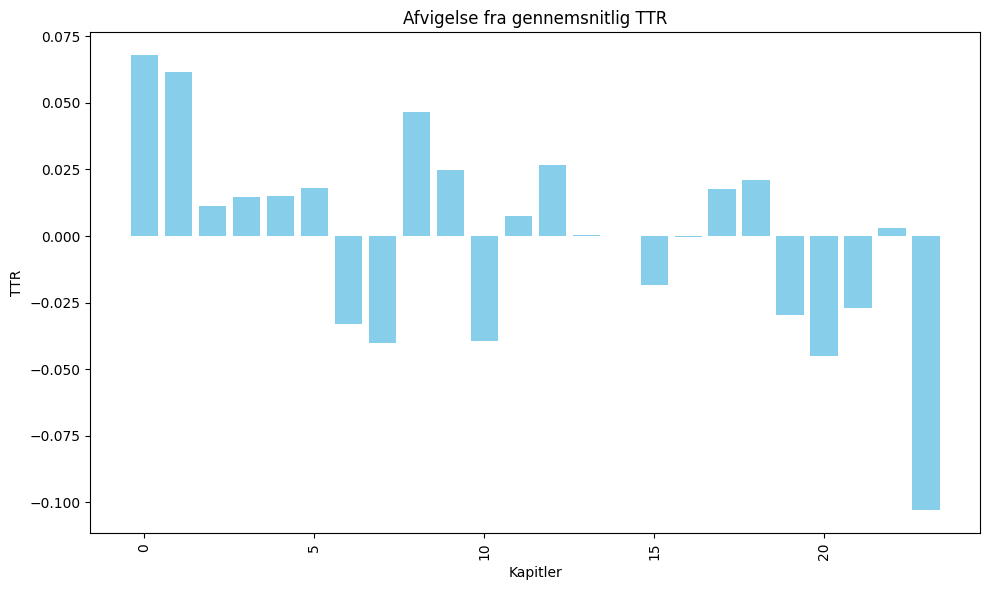

In [39]:
data = subset['TTR_differences'].to_dict()

# Extract keys and values
chap = list(data.keys())
ttr_values = list(data.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(chap, ttr_values, color='skyblue')

# Customize the plot
plt.xlabel('Kapitler')
plt.ylabel('TTR')
plt.title('Afvigelse fra gennemsnitlig TTR')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [40]:
subset.to_csv('frankenstein_subset.csv', index=False)

# Basic text processing 3

Learn about:
1. the algorithm tf-idf
2. to build a "class" to preprocess text


In [41]:
subset = pd.read_csv('frankenstein_subset.csv')

In [42]:
subset.columns

Index(['Section', 'Clean_text', 'Clean_text_wo_stopwords', 'Chapter',
       'Word_count', 'Tokens_count', 'TTR', 'TTR_differences'],
      dtype='object')

# Functions to calculate tf-idf
TF-IDF stands for Term Frequency-Inverse Document Frequency and is a method that can be used to calculate which data is important or more rare than other data when comparing different data sets, for example when comparing different texts in a corpus.

To get the tf-idf calculated, we must use the results of three other calculations:

Result 1: The sum of texts in the corpus (N).

Result 2. Term Frequency (tf). Tf gives the frequency of a word in each of the texts in the corpus. That is, the ratio between the number of times a word appears in a text and the total number of words in the text. The frequency increases the more often a word appears in the text, and tf is calculated for each text in a corpus.

Result 3. Inverse Data Frequency (idf). Idf is used to calculate the weight of rare words across the texts in the corpus. The words that rarely occur in the corpus are given a high IDF score.

It might sound a bit difficult, but let's try to understand it through a concrete example, where two short texts form a corpus..

*************
**Text_1 = a bicycle drives on the cycle path**

**Text_2 = a snail creeps on the forest path***

************


| Word       | Tf (a)    | Tf (b)    | If                | Tf * Idf (a)        | Tf * Idf (b)          |
|:----------:|:---------:|:---------:|:----------------:|:-------------------:|:--------------------:|
| a | 1/5 | 1/5 | log(2/2) = 0 | 0 | 0 |
| bike | 1/5 | 0 | log(2/1) = 0.7 | 0.20 * log(2/1) = 1.4| 0 |
| snail | 0 | 1/5 | log(2/1) = 0.7 | 0 | 0.20 * log(2/1) = 1.4 |
| drives| 1/5 | 0 | log(2/1) = 0.7 | 0.20 * log(2/1) = 1.4| 0 |
| creeps | 0 | 1/5 | log(2/1) = 0.7 | 0 | 0.20 * log(2/1) = 1.4 |
| on | 1/5 | 1/5 | log(2/2) = 0 | 0 | 0 |
| the | 1/5 | 1/5 | log(2/2) = 0 | 0 | 0 |
| cycle | 1/5 | 0 | log(2/1) = 0.7 | 0.20 * log(2/1) = 1.4| 0 |
| forest | 0 | 1/5 | log(2/1) = 0.7 | 0 | 0.20 * log(2/1) = 1.4 |
| path | 1/5 | 1/5 | log(2/2) = 0 | 0 | 0 |

**************


From the table above, we see that the Tf-idf calculation for common words is zero. It shows that they are not special when we compare the texts. The words that have received a high tf-idf score are significant for each text. This is what is the essens in tf-idf; the more common words are, the lower their score.

We will try to use tf-idf as a method to investigate which words appear as special in each chapter when we compare the chapters in the book.

When you put it together as a tf-idf algorithm it can look like this..

In [44]:
import math
# make a list where each item is a chapter of the book
chapters = subset['Clean_text'].to_list()

# Caculate TF
def compute_tf(chapter):
    tf_dict = {}
    words = chapter.split()
    total_words = len(words)
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1
    for word in tf_dict:
        tf_dict[word] = tf_dict[word] / total_words
    return tf_dict

# Caculate IDF
def compute_idf(chapters):
    idf_dict = {}
    total_chapters = len(chapters)
    for chapter in chapters:
        words = set(chapter.split())
        for word in words:
            idf_dict[word] = idf_dict.get(word, 0) + 1
    for word in idf_dict:
        idf_dict[word] = math.log(total_chapters / float(idf_dict[word]))
    return idf_dict

# Caculate TF-IDF
def compute_tfidf(tf, idf):
    tfidf = {}
    for word in tf:
        tfidf[word] = tf[word] * idf.get(word, 0)
    return tfidf


# Caculate TF for each chapter
tf_list = [compute_tf(chapter) for chapter in chapters]

# Caculate IDF for all chapters
idf = compute_idf(chapters)

# Caculate TF-IDF for each chapter
tfidf_list = [compute_tfidf(tf, idf) for tf in tf_list]

In [45]:
# Extract the top ten items with the highest values from each dictionary in the list
def get_top_ten_items(dict_list):
    top_ten_items_list = []
    
    for dictionary in dict_list:
        # Sort the dictionary items by value in descending order
        sorted_items = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
        
        # Get the top ten items
        top_ten_items = sorted_items[:10]
        
        # Store the top ten items in the result list
        top_ten_items_list.append(top_ten_items)
    
    return top_ten_items_list

# Back to the subset dataframe
subset['tfidf'] = get_top_ten_items(tfidf_list) # return a list of tuples

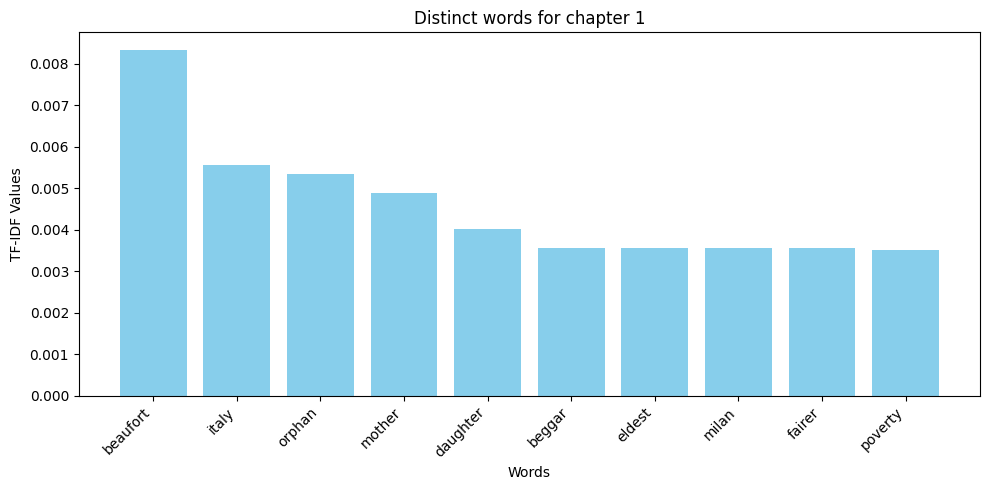

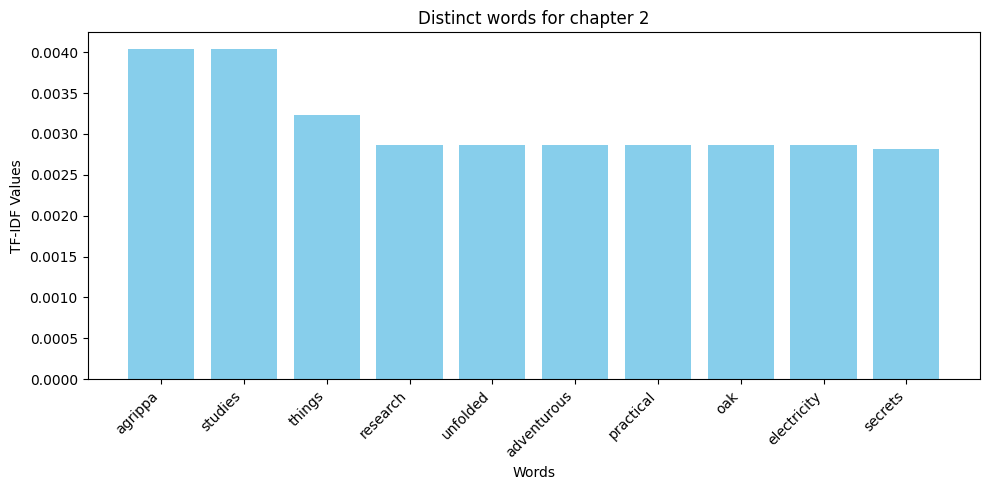

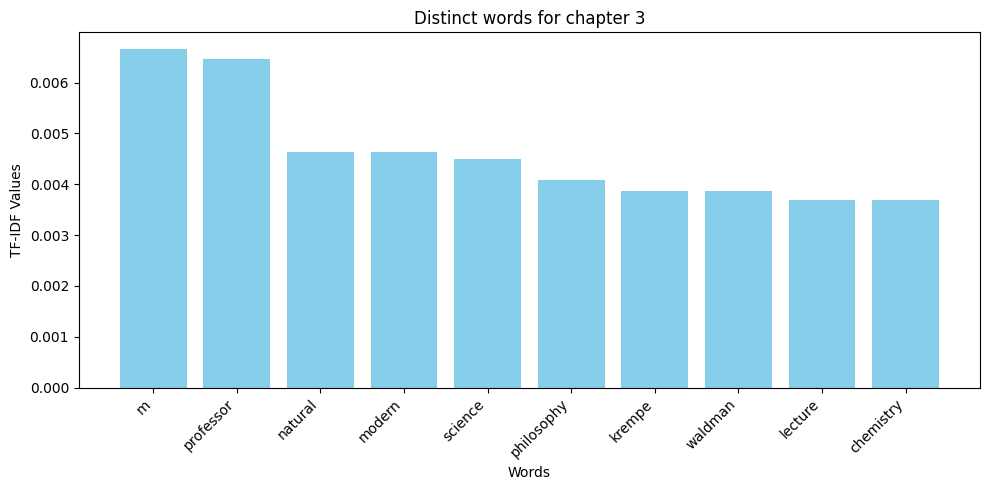

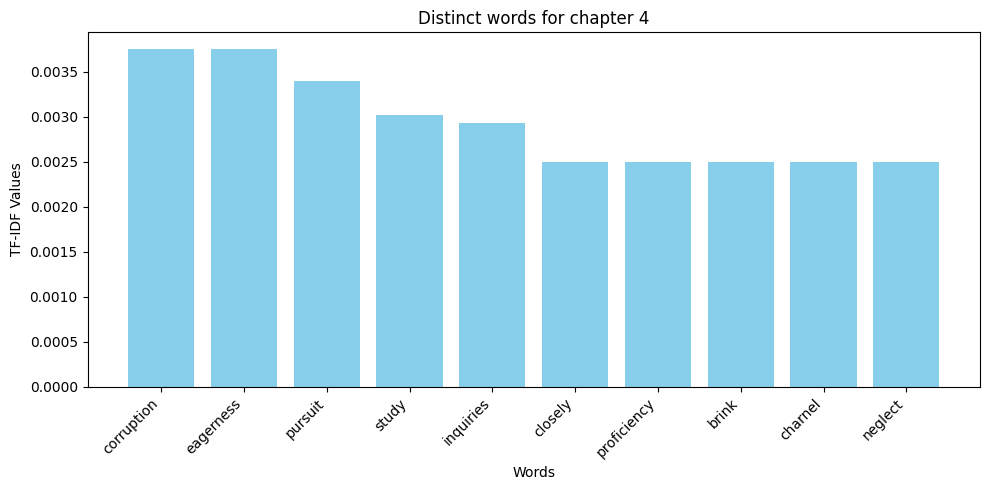

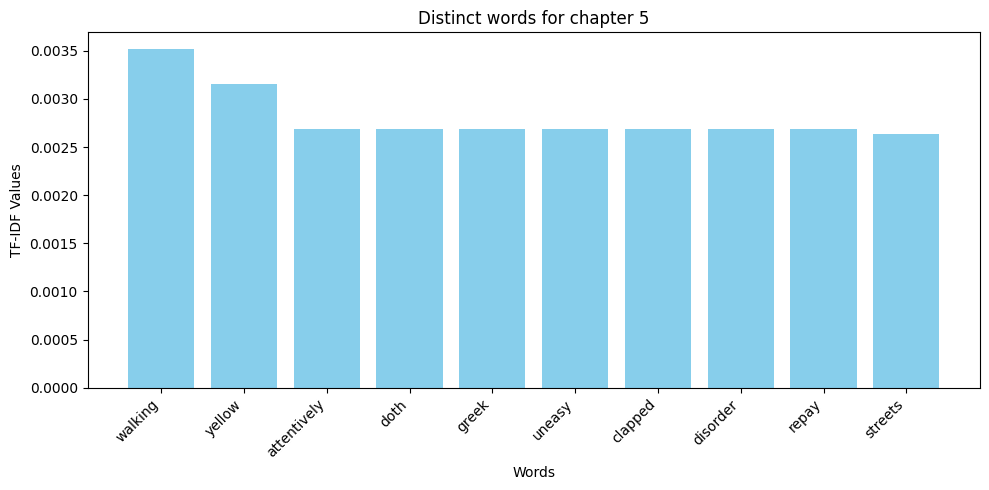

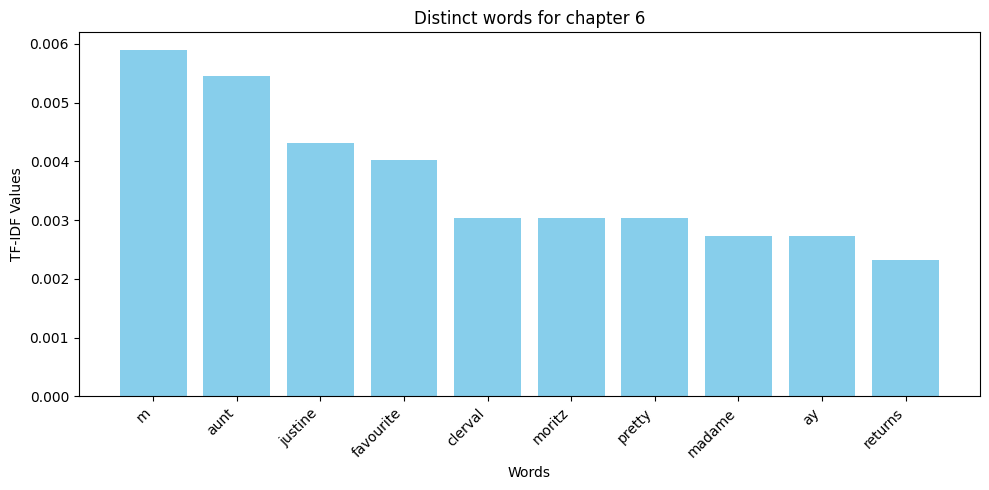

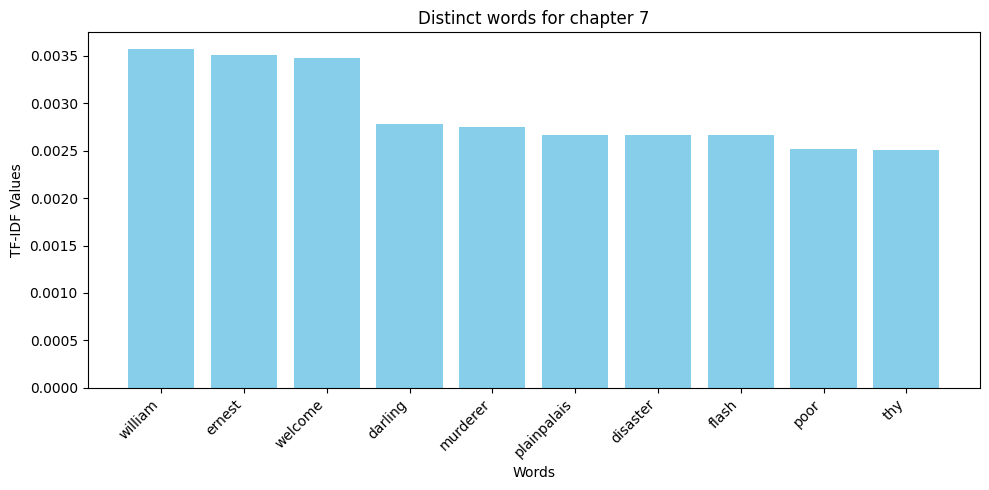

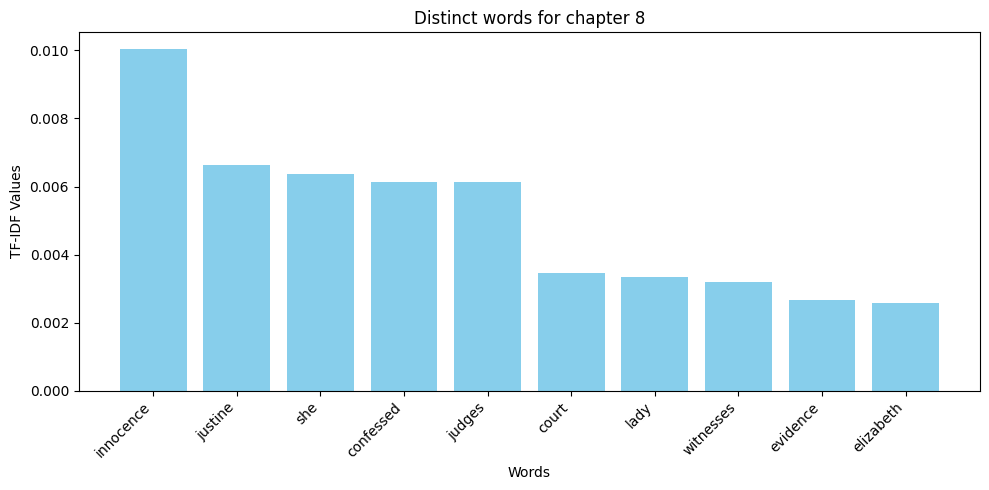

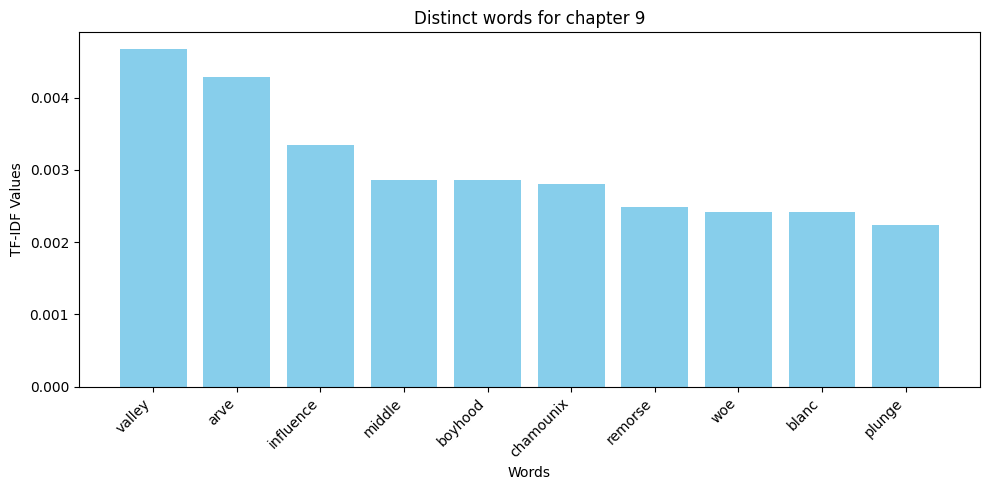

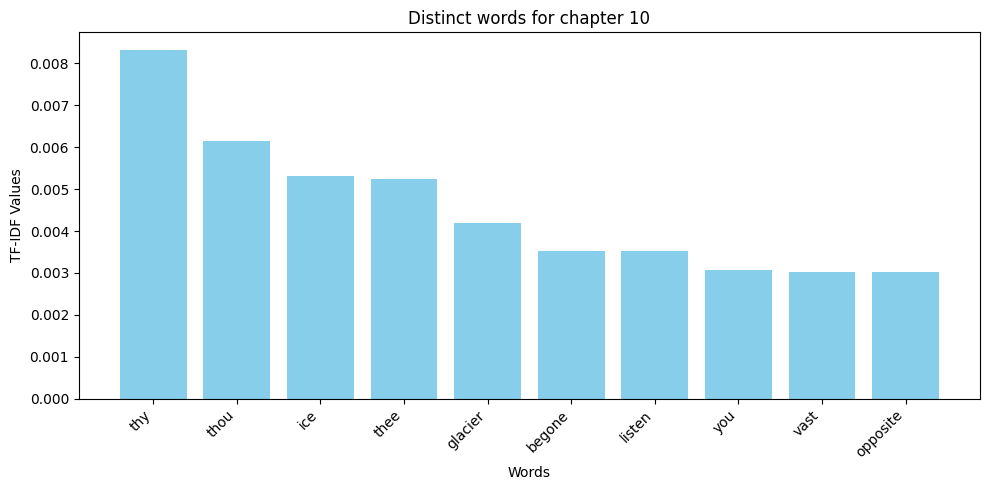

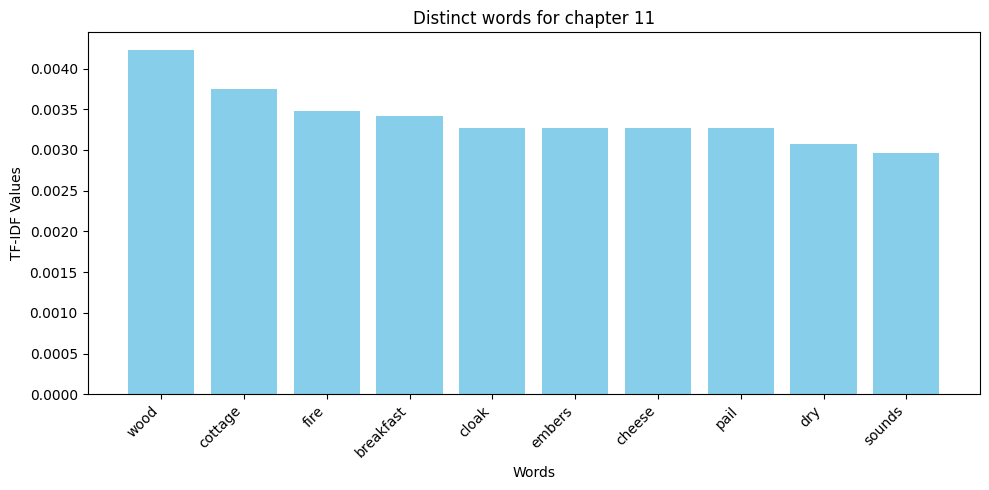

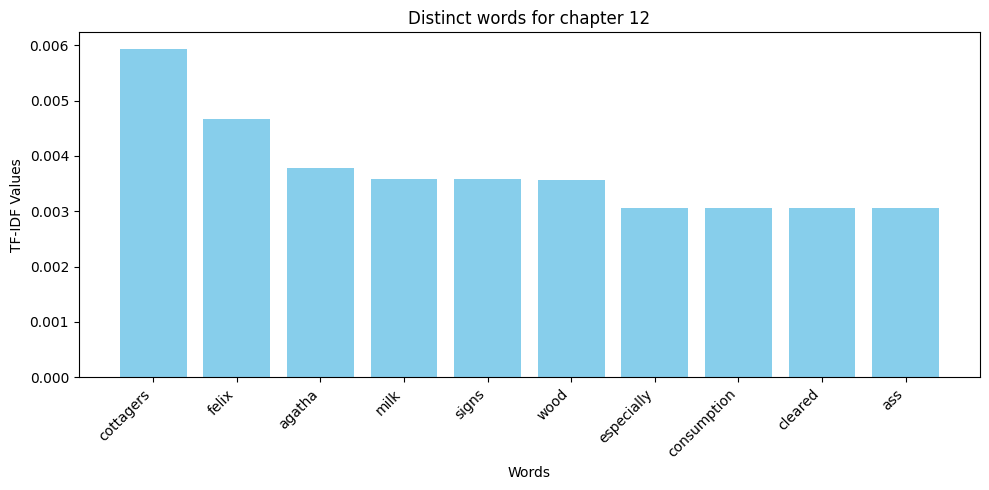

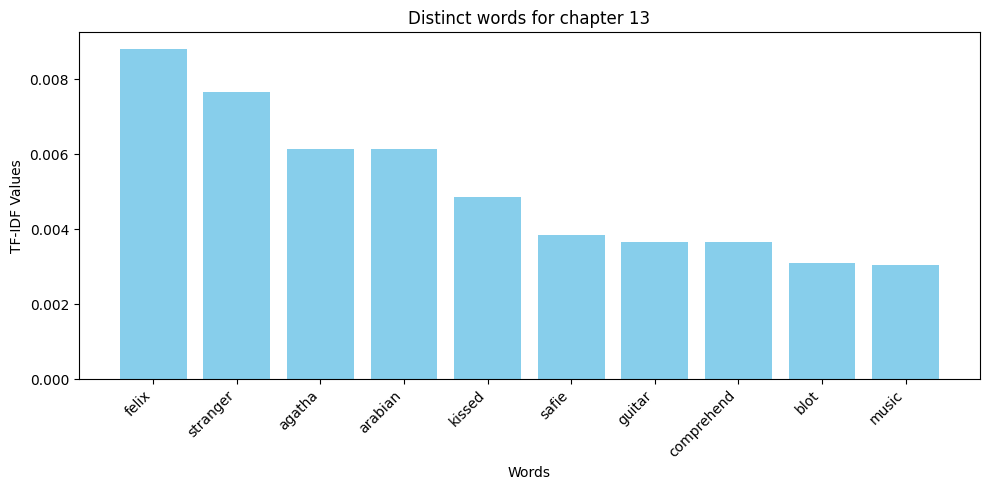

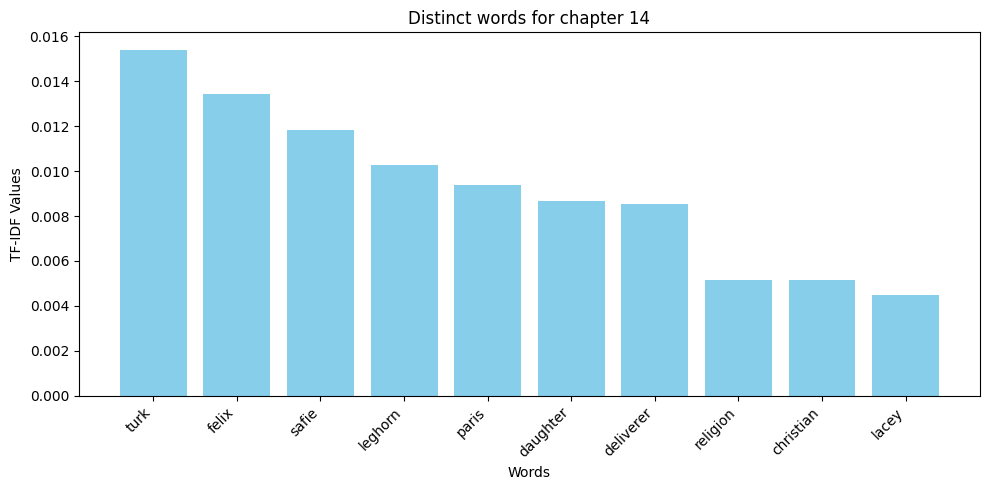

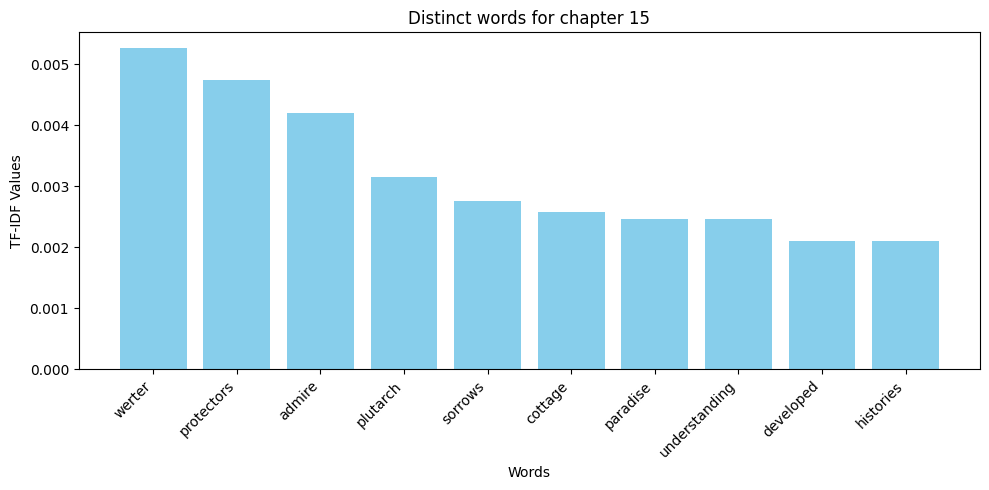

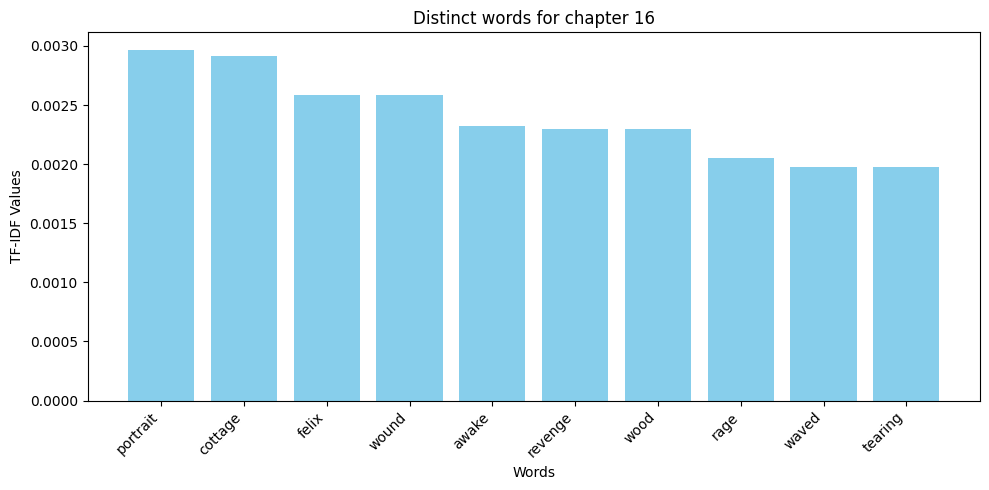

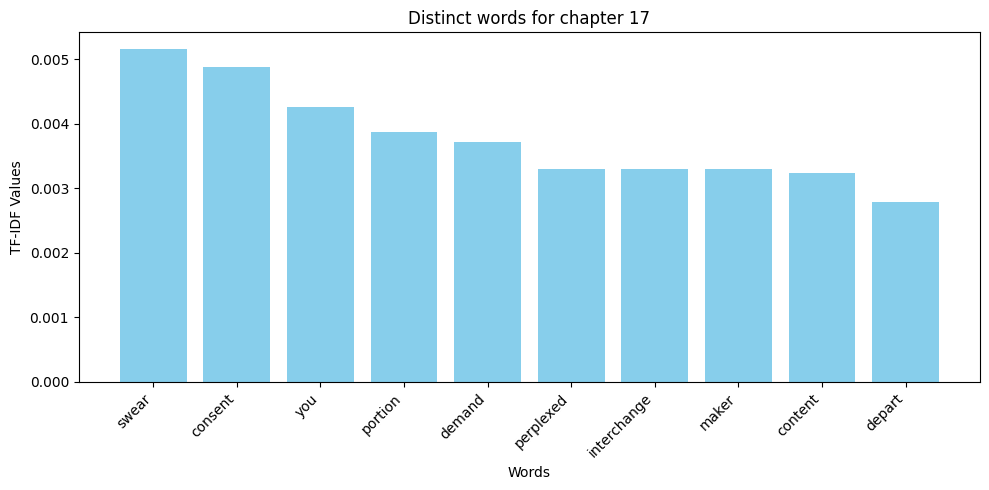

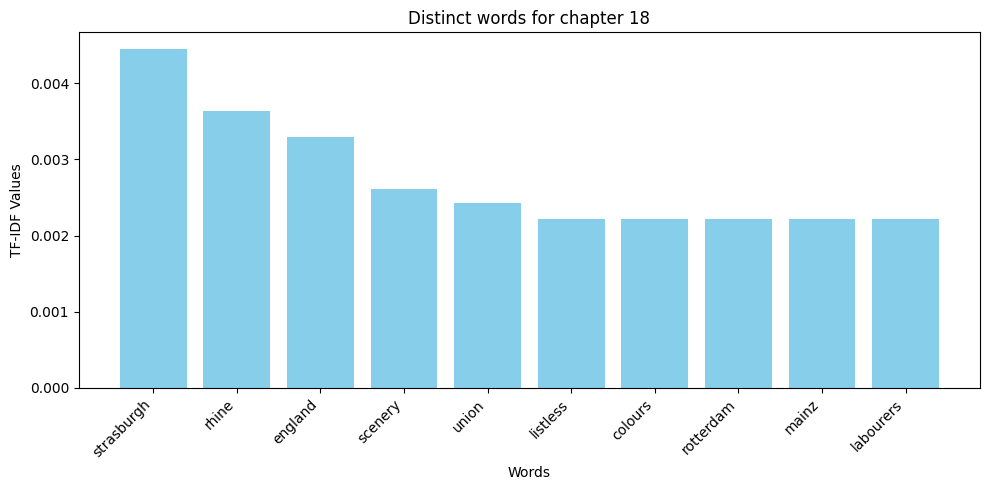

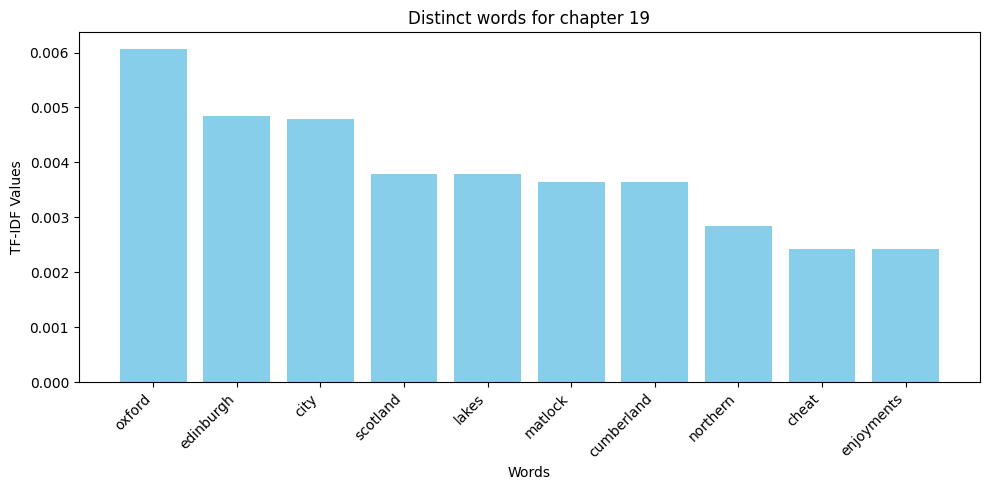

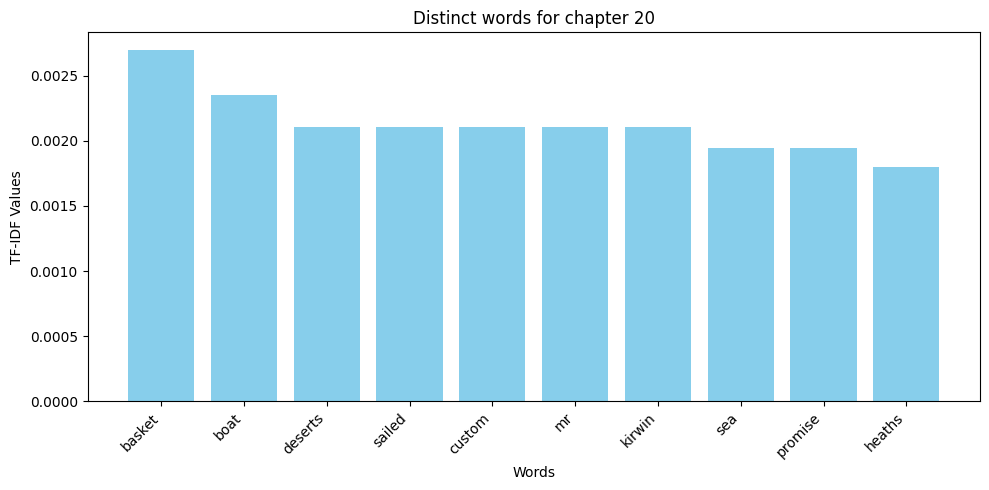

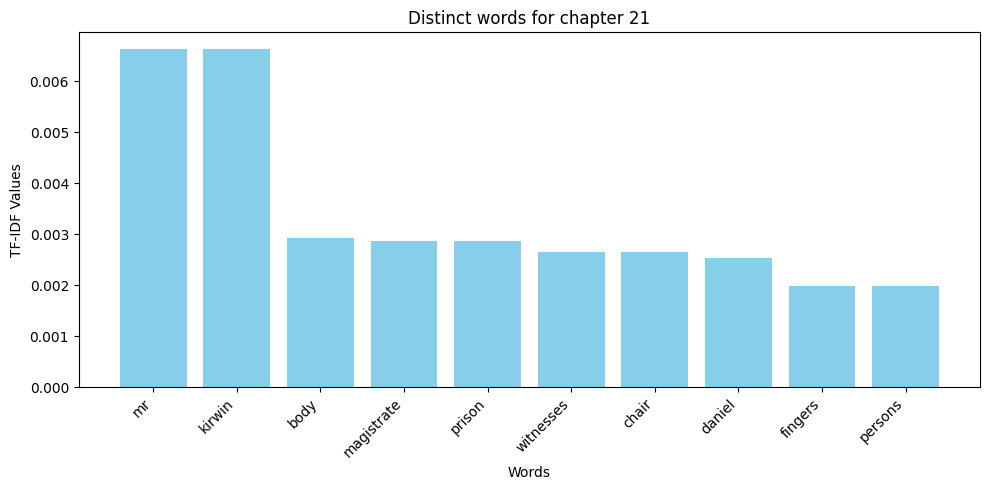

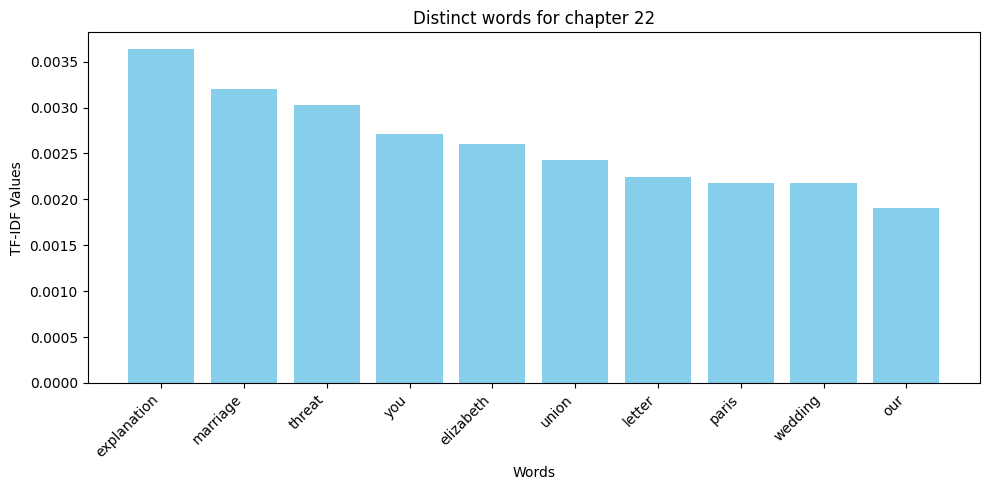

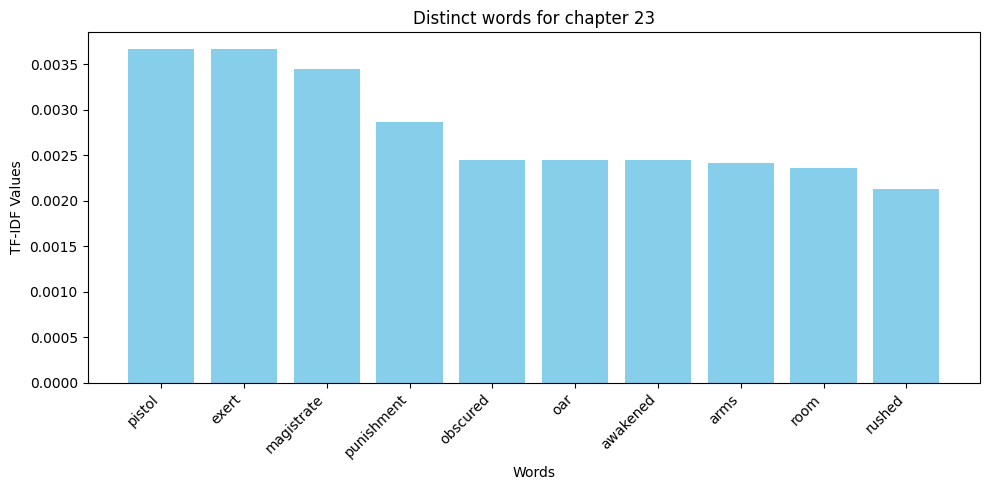

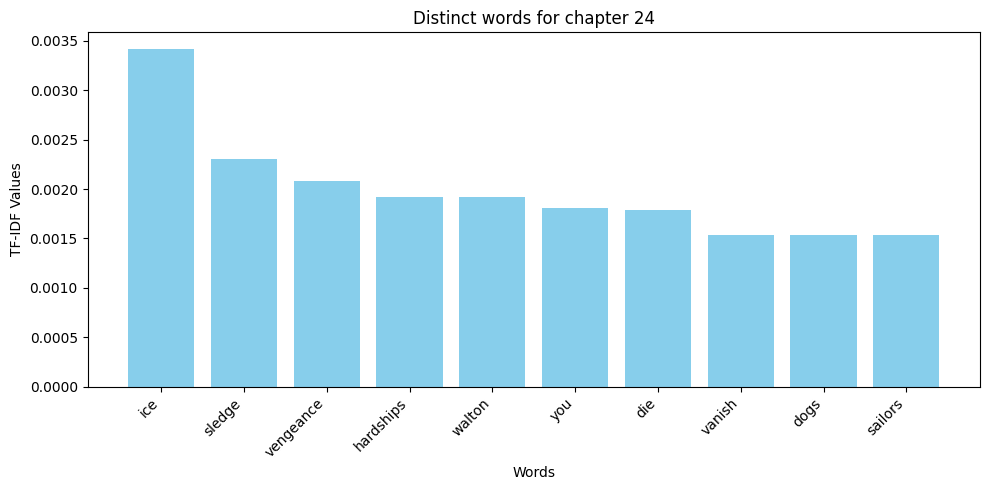

In [46]:
tfidf_data = subset['tfidf'].to_list()

# Plotting each list of words and values
for i, tfidf_list in enumerate(tfidf_data):
    words, values = zip(*tfidf_list)
    plt.figure(figsize=(10, 5))
    plt.bar(words, values, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Values')
    plt.title(f'Distinct words for chapter {i+1}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Objects

Now it should be about [objects](https://www.w3schools.com/python/python_classes.asp).

Below we build an object that has two methods that can clean text by removing grammatical characters and filtering out stop words.

The script starts with the class keyword, which creates the object. The class name is defined as 'PreprocessText'.

We don't need to use the name self. It can be different, but it must be the same name at the beginning of all functions in the object.



This is followed by two functions; text_scrubber and filter stopwords.

Text_scrubber:
 - The method starts by converting the input text to lowercase
 - It then removes underscores from the text
 - Findall allows specifying a RegEX pattern and returns a list of words
 - The word list is joined with ' '.join() to a single text string separated by spaces
 - The resulting sanitized text string is returned

Filter_stopwords:
 - the split method splits the entered cleaned text into a word list
 - with open() it loads stop words from a file named 'en.txt'
 - It filters the stop words using a list comprehension
 - The remaining words are gathered in a single text string separated by spaces
 - Text string without stop words is returned

In [47]:
import re
class PreprocessText:
    def text_scrubber(self, text, regex_str):
        # Convert text to lowercase
        lower_text_string = text.lower()
        # Remove underscores
        text_wo_underscores = lower_text_string.replace('_', '')
        # Find all matches of the regex pattern
        list_w_clean_text = re.findall(regex_str, text_wo_underscores)
        # Join list items into a single string
        clean_text_string = ' '.join(list_w_clean_text)
        return clean_text_string

    def filter_stopwords(self, clean_text):
        # Split the clean text into words
        word_list = clean_text.split()
        # Read stopwords from file
        with open('en.txt', 'r', encoding='utf-8') as f:
            stopwords = f.read().splitlines() # splitlines() anvendes i stedet for .split('\n') 
        # Filter out stopwords
        word_list_wo_stopwords = [word for word in word_list if word not in stopwords]
        # Join the filtered words into a single string
        clean_text_wo_stopwords = ' '.join(word_list_wo_stopwords)
        return clean_text_wo_stopwords

preprocess = PreprocessText()
scrubbed_text = preprocess.text_scrubber(text, r'\w+')
filtered_text = preprocess.filter_stopwords(scrubbed_text)

print (scrubbed_text[1000:2000])
print (10*'*')
print (filtered_text[1000:2000])


ancing gives me a foretaste of those icy climes inspirited by this wind of promise my daydreams become more fervent and vivid i try in vain to be persuaded that the pole is the seat of frost and desolation it ever presents itself to my imagination as the region of beauty and delight there margaret the sun is for ever visible its broad disk just skirting the horizon and diffusing a perpetual splendour there for with your leave my sister i will put some trust in preceding navigators there snow and frost are banished and sailing over a calm sea we may be wafted to a land surpassing in wonders and in beauty every region hitherto discovered on the habitable globe its productions and features may be without example as the phenomena of the heavenly bodies undoubtedly are in those undiscovered solitudes what may not be expected in a country of eternal light i may there discover the wondrous power which attracts the needle and may regulate a thousand celestial observations that require only thi

In [49]:
class Analyse_text:
   
    def term_freq(self, scrubbed_text, filtered_text):
        tf_dict = {}
        total_words = len(scrubbed_text.split())
        for word in filtered_text.split():
            tf_dict[word] = tf_dict.get(word, 0) + 1 # adding item og .get method
        
        # return relative frequence
        for word in tf_dict:
            tf_dict[word] = tf_dict[word] / total_words # return relative frequence of raw frequence 
        
        # Sort dictionary
        tf_dict_sorted = dict(sorted(tf_dict.items(), key=lambda item: item[1], reverse=True))
                
        # choose items with the 25 highest values
        most_common = 25
        most_common_keywords = dict(list(tf_dict_sorted.items())[:most_common])
        return most_common_keywords


analysis = Analyse_text()
most_common_terms = analysis.term_freq(scrubbed_text, filtered_text)
print (most_common_terms)



{'will': 0.002574207502355267, 'man': 0.0018178681846529464, 'father': 0.0017780608521422978, 'life': 0.0015259477462415245, 'eyes': 0.0013799875270358133, 'time': 0.0013003728620145164, 'night': 0.0012340273078301023, 'elizabeth': 0.0012207581969932194, 'mind': 0.0011278744211350397, 'day': 0.0010880670886243913, 'heart': 0.0010747979777875085, 'felt': 0.0010615288669506256, 'death': 0.0010482597561137428, 'feelings': 0.0010084524236030944, 'thought': 0.0009819142019293287, 'dear': 0.0009553759802555631, 'friend': 0.0009421068694186802, 'passed': 0.0008890304260711489, 'miserable': 0.0008624922043973833, 'place': 0.0008492230935605005, 'heard': 0.0008226848718867349, 'love': 0.0007828775393760864, 'clerval': 0.0007828775393760864, 'human': 0.0007696084285392035, 'appeared': 0.0007563393177023208}
